<h1>K-Means</h1>

K-Means gehört der Gruppe der Unsupervised Machine learning an. <br>
Das bedeutet, dass K-Means keine Datasets mit einem Label benötigt, um zu funktionieren.

<i>Abb1</i>: Sterne suchen das Zentrum, keine Neuordnung der Punkte.

<img src="./files_data/img/sklearn_kmeans_1.PNG" width=700 hight=700>

K-Means versucht in einer Menge von angeordneten Datenpunkten eine Struktur zu finden, ein- oder mehrere Cluster.

Bei dieser Suche wird ein K-Parameter angegeben, der sagt, wie viele Cluster es geben soll. Ziel ist es dabei, die SSE (Sum of Squared Errors ) zu minimieren.

Als Erstes werden K-Sterne platziert, die dann das Zentrum bilden sollen. Von diesen Sternen werden die Abstände zu den Datenpunkten gemessen, um festzustellen, welche dieser Punkte zu welchem Stern gehört, die dann ein Cluster bilden sollen.

Danach wird versucht, das Zentrum dieser Punkte zu finden. Nach der Bewegung der Sterne zum Zentrum, werden die Abstände zu den Datenpunkten neu berechnet, und es gibt neue Zugehörigkeiten.

Danach beginnt das Spiel von vorne, bis sich die Zugehörigkeit der Datenpunkte zu den Sternen, die das Zentrum bilden, nicht ändern.

Je nachdem wie die Sterne platziert werden, gibt es unterschiedliche viele Schritte, um zum Ende zu kommen.

Die Entfernung zwischen den Punkten kann zum Beispiel mit der Euklidischen Distanz berechnet werden. 

Um den optimalen Wert für das K zu finden, wird eine besondere Methode namens Elbow Methode. <br>
Der Name kommt daher, dass die gebildete Kurve einem Arm mit Ellbogen gleicht, wobei der Ellbogen dann den optimalen Wert anzeigt.


<i>Abb2</i>: Berechne SSE der Cluster, je niedriger, desto besser. 

<img src="./files_data/img/sklearn_kmeans_2.PNG" width=500 hight=500>

Damit lassen sich gut Anomalien und Gruppierungen von Datenpunkten finden.

Ein Anwendungsbeispiel wäre zum Beispiel das Zuordnen von Datenpunkten zu Blumendaten, zum Iris Dataset. 

In [1]:
import pandas as pd

from matplotlib  import pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster  import KMeans

In [2]:
iris_data = load_iris()
dir(iris_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
# Lade Daten in ein Dataframe.
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
# Füge Klasse hinzu. 
iris_df = pd.concat([iris_df, pd.DataFrame(iris_data.target, columns=['flower'])], axis="columns")
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Jetzt wird eine Eigenschaft der Blume auf einem Scatterplot visualisiert. <br>
Man kann sehen das es drei Cluster sind, da wir 3 Klassen haben.

Trotzdem kann man nach mehr oder weniger Cluster suchen, und der optimale Wert wird später durch die Ellbogenmethode ermittelt.

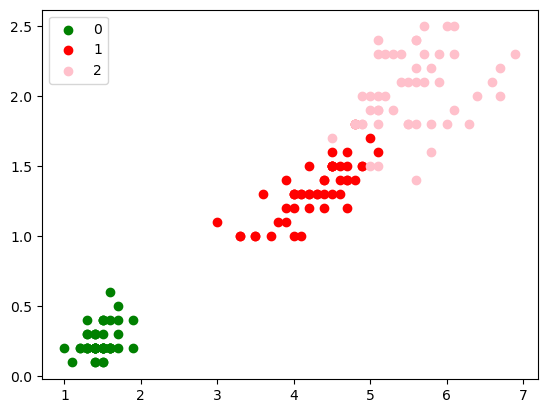

In [15]:
classes = [0, 1, 2]
colors  = ['green', 'red', 'pink']
for i in classes:
    plt.scatter(iris_df.loc[ iris_df['flower']==i, ['petal length (cm)']] , \
            iris_df.loc[ iris_df['flower']==i, ['petal width (cm)']], color=colors[i], label=i)

plt.legend()

Jetzt geht es darum, den optimalen Wert für K zu finden. 

Dazu geben wir einen Bereich an, zum Beispiel 0 bis 10, und schauen uns an, wie sich der Wert von SSE ändert.

In [5]:
sse = []  # Sammel SSE Werte.

k_val = range(1, 10) # K-Werte im Bereich 1 bis 10. 

# Setze verschiedene K-Werte ein und entnehmen den SSE Wert.
for k in k_val:
    model = KMeans(n_clusters=k)  # Setze den K Parameter .
    model.fit( iris_df[ ['petal length (cm)','petal width (cm)'] ] ) 
    sse.append(model.inertia_)

C:\Users\Alexander\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alexander\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alexander\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alexander\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL

In [6]:
# Je mehr Zentren, desto kleiner der SSE Wert. 
sse

[550.8953333333333,
 86.39021984551395,
 31.371358974358976,
 19.465989010989013,
 13.91690875790876,
 11.087223662604789,
 9.244804827285606,
 7.679235060690943,
 6.552754976907152]

Dieses Array mit den K Werten wird als Plot visualisiert.

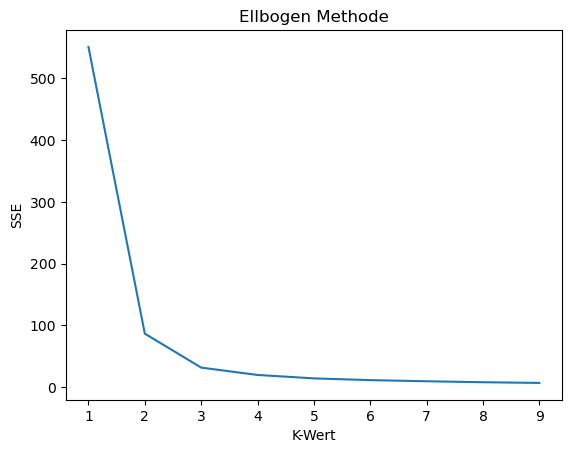

In [7]:
%matplotlib inline
plt.title("Ellbogen Methode")
plt.xlabel("K-Wert")
plt.ylabel('SSE')
plt.plot(k_val, sse)

In dem Plot sieht man deutlich die veränderung der Kurve.

3 ist laut der Methode ein guter Wert, denn wir nutzen sollten.

In [8]:
model = KMeans(n_clusters=3)
# Mit fit_predict auch gleich die Predictions machen. 
predicted = model.fit_predict( iris_df[ ['petal length (cm)','petal width (cm)'] ] ) 
predicted  # 

C:\Users\Alexander\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alexander\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
# Füge die vorhergesagten Werte ein.
iris_df['predicted'] = predicted

In [10]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,predicted
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


Das Model kann die Punkte die das Zentrum darstellen ausgeben. Das wird mit auf den Plot genommen.

In [11]:
model.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

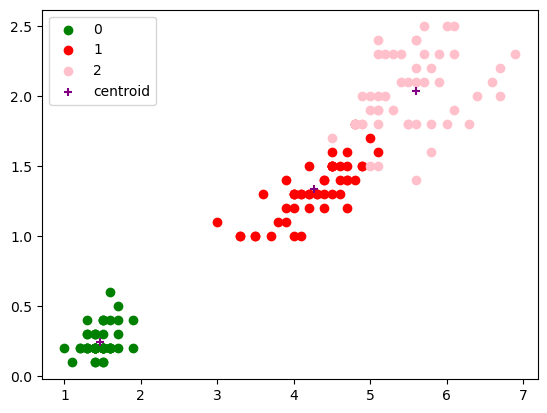

In [16]:
# Dasselbe wie oben, aber mit Zentrum. 
classes = [0, 1, 2]
colors  = ['green', 'red', 'pink']
for i in classes:
    plt.scatter(iris_df.loc[ iris_df['flower']==i, ['petal length (cm)']] , \
            iris_df.loc[ iris_df['flower']==i, ['petal width (cm)']], color=colors[i], label=i)
# Plotte Zentrum. 
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
plt.legend()

In [13]:
# Führe normale Predictions aus
model.predict([ [3, 0.5] ])

C:\Users\Alexander\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

Zusammengefasst ist K-Means ein recht simpler Algorithmus, der keine Labels braucht und unter die Kategorie Unsupervised Learning fällt. 

Mit K-Means können Datenpunkten eine Zugehörigkeiten in einem Cluster gegeben werden. Wie bei dem Iris Dataset können dann die Daten nach Clustern gruppiert und ähnliche neue Daten durch die Zugehörigkeit klassifiziert werden.